# **Installing library**

In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.3 MB/s eta 0:00:00


# **Importing all libraries**

In [2]:
from fastai.vision.all import *

# **Mounting Google Drive to load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Verifying Data**

In [4]:
failed= verify_images(get_image_files("/content/drive/MyDrive/Grow!!/Potato"))
len(failed)

0

# **Creating a DataBlock**

In [5]:
potato = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=RandomResizedCrop(256,min_scale=0.5),
batch_tfms=aug_transforms()
)

# **Loading Data to Dataloaders**

In [6]:
dls= potato.dataloaders('/content/drive/MyDrive/Grow!!/Potato')

# **Viewing Data**

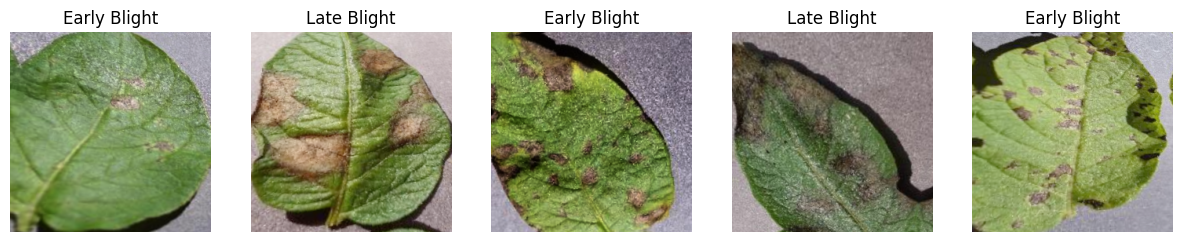

In [7]:
dls.train.show_batch(max_n=5,nrows=1)

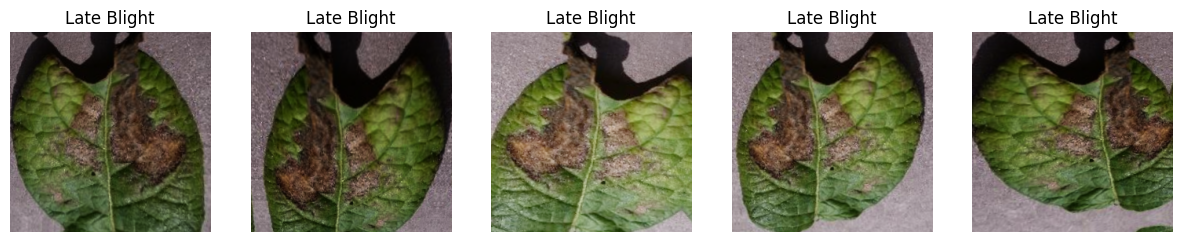

In [8]:
dls.train.show_batch(max_n=5,nrows=1,unique=True)

# **Fine tuning a pretrained model (resnet18)**

In [9]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 95.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.853665,0.120800,0.046512,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.165935,0.061874,0.023256,00:12
1,0.128046,0.031093,0.004651,00:13
2,0.083324,0.028614,0.009302,00:13


# **Exporting model as a pkl file**

In [10]:
learn.export('model.pkl')